# Computing the Gradient

Suppose the following function represents the price of a house based on its location from a city hospital ($x_1$) and the market ($x_2$). 

$$f(x_1,x_2)=(x_1 + 2)(x_1 - 5) + (x_2+1)(x_2-3)

Gradient of f(x) at x = (-3.000, -2.000) is (-9.000, -6.000)


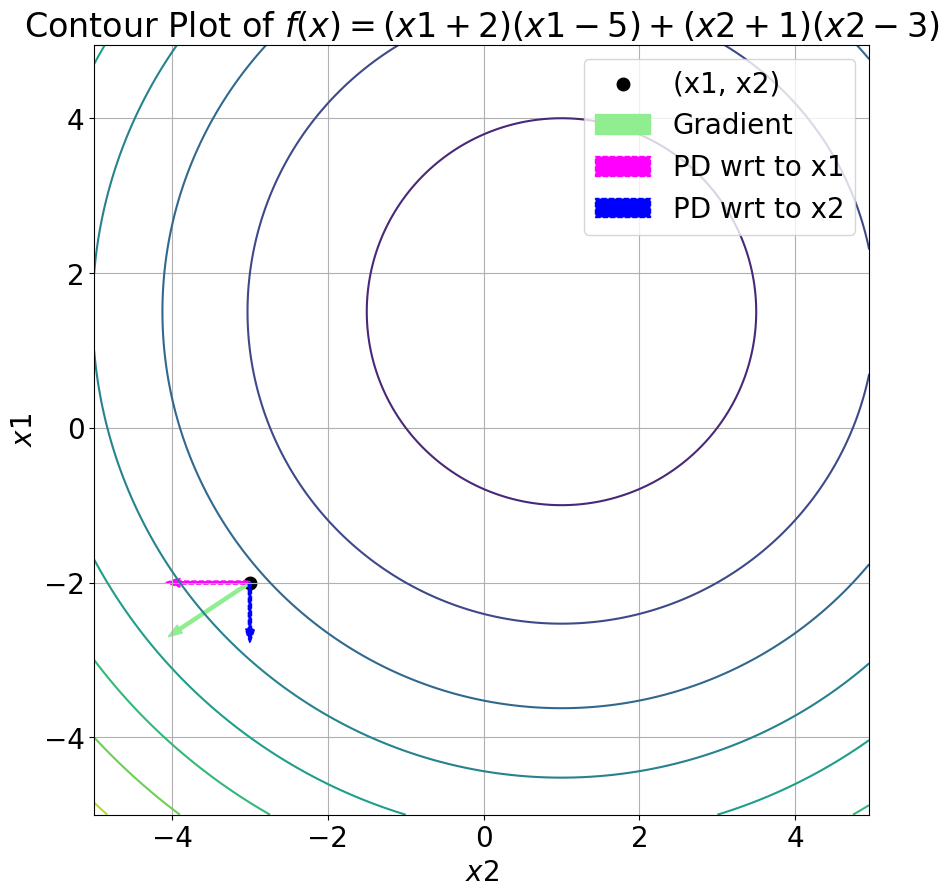

In [30]:
import numpy as np
from scipy.optimize import approx_fprime
import matplotlib.pyplot as plt

# Objective function
def objective(x1, x2):
    return (x1 + 2) * (x1 - 5) + (x2 + 1) * (x2 - 3)

# Initial points
x1_0, x2_0 = -3, -2
f = objective(x1_0, x2_0)

# Gradient calculation using approx_fprime
epsilon = np.sqrt(np.finfo(float).eps)
x0 = np.array([x1_0, x2_0])

def wrapped_objective(x):
    return objective(x[0], x[1])

gradient = approx_fprime(x0, wrapped_objective, epsilon)
df_x1, df_x2 = gradient

print("Gradient of f(x) at x = (%.3f, %.3f) is (%.3f, %.3f)" % (x1_0, x2_0, df_x1, df_x2))

# Plot the curve for graphic visualization
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 20})
x1s, x2s = np.arange(-5.0, 5.0, 0.05), np.arange(-5.0, 5.0, 0.05)
zs = [[objective(x1, x2) for x2 in x2s] for x1 in x1s]
plt.contour(x2s, x1s, zs)
plt.title(r'Contour Plot of $f(x)=(x1 + 2)(x1 - 5) + (x2 + 1)(x2 - 3)$')
plt.xlabel(r'$x2$')
plt.ylabel(r'$x1$')

p1 = plt.scatter(x1_0, x2_0, color='black', linewidths=4, label='(x1, x2)')
a1 = plt.arrow(x1_0, x2_0, 0.1 * df_x1, 0.1 * df_x2, color='lightgreen', width=0.04, label='Gradient')
a2 = plt.arrow(x1_0, x2_0, 0.1 * df_x1, 0, color='magenta', width=0.04, ls='--', label='PD w.r.t to x1')
a3 = plt.arrow(x1_0, x2_0, 0, 0.1 * df_x2, color='blue', width=0.04, ls='--', label='PD w.r.t to x2')
plt.legend([p1, a1, a2, a3], ['(x1, x2)', 'Gradient', 'PD wrt to x1', 'PD wrt to x2'])
plt.grid()